## Preparação:
- remoção do postgres caso ele já esteja no computador.

In [2]:
%%bash
# Parar o serviço do PostgreSQL, caso esteja em execução
sudo systemctl stop postgresql 

# Remover pacotes relacionados ao PostgreSQL
sudo apt-get --purge remove postgresql*

# Remover pacotes que não são mais necessários
sudo apt-get autoremove

# Limpar pacotes desnecessários
sudo apt-get autoclean

# Remover diretórios de dados do PostgreSQL
sudo rm -rf /var/lib/postgresql/

# Remover configurações do PostgreSQL
sudo rm -rf /etc/postgresql/

# Verificar a versão do PostgreSQL instalada (se existir)
psql --version

Lendo listas de pacotes...
Construindo árvore de dependências...
Lendo informação de estado...
O pacote 'postgresql-pgmp' não está instalado, por isso não será removido
O pacote 'postgresql-9.1' não está instalado, por isso não será removido
O pacote 'postgresql-postgis-java' não está instalado, por isso não será removido
O pacote 'postgresql-10-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-11-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-12-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql-13-auto-failover' não está instalado, por isso não será removido
O pacote 'postgresql' não está instalado, por isso não será removido
O pacote 'postgresql-client' não está instalado, por isso não será removido
O pacote 'postgresql-doc' não está instalado, por isso não será removido
O pacote 'postgresql-14-asn1oid' não está instalado, por isso não será removido
O pacote 'postgresql-14-auto-failo

Terminado


7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

- clonagem do repositório, junto dos comandos iniciais

In [1]:
!git clone https://github.com/foliveirafilho/tpch-pgsql.git
!cp teste.ipynb tpch-pgsql
!cd tpch-pgsql
!wget -q https://github.com/electrum/tpch-dbgen/archive/32f1c1b92d1664dba542e927d23d86ffa57aa253.zip -O tpch-dbgen.zip
!unzip -q tpch-dbgen.zip && mv tpch-dbgen-32f1c1b92d1664dba542e927d23d86ffa57aa253 tpch-dbgen && rm tpch-dbgen.zip
!mv tpch-dbgen tpch-pgsql

Cloning into 'tpch-pgsql'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 164 (delta 0), reused 0 (delta 0), pack-reused 160 (from 1)
Receiving objects: 100% (164/164), 774.38 KiB | 331.00 KiB/s, done.
Resolving deltas: 100% (69/69), done.


- reinstalação do postgres

In [3]:
!sudo apt-get install -y postgresql postgresql-contrib


Lendo listas de pacotes... Pronto
Construindo árvore de dependências... Pronto
Lendo informação de estado... Pronto        
Os pacotes adicionais seguintes serão instalados:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14 libpq5
  libtypes-serialiser-perl postgresql-14 postgresql-client-14
  postgresql-client-common postgresql-common
Pacotes sugeridos:
  postgresql-doc postgresql-doc-14
Os NOVOS pacotes a seguir serão instalados:
  libcommon-sense-perl libjson-perl libjson-xs-perl libllvm14 libpq5
  libtypes-serialiser-perl postgresql postgresql-14 postgresql-client-14
  postgresql-client-common postgresql-common postgresql-contrib
0 pacotes atualizados, 12 pacotes novos instalados, 0 a serem removidos e 0 não atualizados.
É preciso baixar 0 B/41,9 MB de arquivos.
Depois desta operação, 160 MB adicionais de espaço em disco serão usados.
Pré-configurando pacotes ...
A seleccionar pacote anteriormente não seleccionado libcommon-sense-perl:amd64.
(Lendo banco de dados ... 32

- verificação das versões

In [4]:
!gcc --version
!python3 --version
!pg_config --version


gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Python 3.10.12
PostgreSQL 14.13 (Ubuntu 14.13-0ubuntu0.22.04.1)


## Passo a passo repositório

- instalação do programa 

In [4]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


- Criação de usuário no postgres

In [5]:
!sudo -u postgres createuser tpch
!sudo -u postgres createdb tpchdb
!sudo -u postgres psql -c "ALTER USER tpch WITH ENCRYPTED PASSWORD '1234';"
!sudo -u postgres psql -c "GRANT ALL PRIVILEGES ON DATABASE tpchdb TO tpch;"
!PGPASSWORD=1234 psql -h localhost -p 5432 -d tpchdb -U tpch -c "\l"


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
ALTER ROLE
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
GRANT
                                  List of databases
   Name    |  Owner   | Encoding |   Collate   |    Ctype    |   Access privileges   
-----------+----------+----------+-------------+-------------+-----------------------
 postgres  | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | 
 template0 | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | =c/postgres          +
           |          |          |             |             | postgres=CTc/postgres
 template1 | postgres | UTF8     | pt_BR.UTF-8 | pt_BR.UTF-8 | =c/postgres          +
           |          |          |             |  

- rodando o programa (comparar com a versão do jhon)

In [6]:
!python3 tpch_pgsql.py prepare -H localhost -p 5432 -U tpch -W '1234' -d tpchdb -i ./data
#executando  com tpch-dbgen dentro de tpch-pgsql
#deu certo
#passo 3

!python3 tpch_pgsql.py load -H localhost -p 5432 -U tpch -W '1234' -d tpchdb
#passo 3

!python3 tpch_pgsql.py query -H localhost -p 5432 -U tpch -W '1234' -d tpchdb
#passo 3

make: Nada a ser feito para 'all'.
built dbgen from source
TPC-H Population Generator (Version 2.14.0)
Copyright Transaction Processing Performance Council 1994 - 2010
Generating data for suppliers table
Preloading text ...                                                                                                                                                                                                                                                                                                              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

## Tarefa 4: identificação do sistema

In [72]:
!echo "--------------------NOME PROCESS--------------"
!lscpu | grep "Nome"
!echo ""
!echo "---------------RAM------------------"
!free -h # Detalhes sobre a memória RAM tarefa 4
!echo ""
!echo "---------------Disco------------------"
!lsblk -o NAME,SIZE,TYPE | grep "disk" # Detalhes sobre o disco tarefa 4
!echo ""
!echo "---------------cache------------------"
!lscpu | grep -i "cache"  # Cache do processador tarefa 4
!echo ""
!echo "---------------Distro------------------"
!lsb_release -a | grep "Distributor" # Detalhes da distribuição e versão do Linux tarefa 4
!echo ""
!echo "---------------SO e Kernel------------------"
!uname -a # Informações sobre o Sistema Operacional e Kernel tarefa 4

--------------------NOME PROCESS--------------


Nome do modelo:                       12th Gen Intel(R) Core(TM) i5-12450H

---------------RAM------------------
               total       usada       livre    compart.  buff/cache  disponível
Mem.:          7,5Gi       2,9Gi       728Mi       859Mi       3,8Gi       3,3Gi
Swap:          2,0Gi       1,1Gi       928Mi

---------------Disco------------------
nvme0n1     238,5G disk

---------------cache------------------
cache de L1d:                         320 KiB (8 instances)
cache de L1i:                         384 KiB (8 instances)
cache de L2:                          7 MiB (5 instances)
cache de L3:                          12 MiB (1 instance)

---------------Distro------------------
No LSB modules are available.
Distributor ID:	Zorin

---------------SO e Kernel------------------
Linux Mengo 6.8.0-48-generic #48~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Oct  7 11:24:13 UTC 2 x86_64 x86_64 x86_64 GNU/Linux


## Tarefa 5:Verificação de Parâmetros de Armazenamento (Adaptada para SSD)


In [73]:
!echo "---------------Capacidade Disco------------------"
!lsblk -o NAME,SIZE,TYPE | grep "disk" 

---------------Capacidade Disco------------------
nvme0n1     238,5G disk


In [ ]:
!sudo apt-get install smartmontools 
#programa para rodar o próximo comando


In [52]:
# Verificando informações de latência do SSD usando smartctl
!sudo smartctl -a /dev/nvme0n1 #mudar o /dev/... pelo nome do ssd do computador

smartctl 7.2 2020-12-30 r5155 [x86_64-linux-6.8.0-48-generic] (local build)
Copyright (C) 2002-20, Bruce Allen, Christian Franke, www.smartmontools.org

=== START OF INFORMATION SECTION ===
Model Number:                       SM2P41C8-256GC1
Serial Number:                      KO022L1KKNGD
Firmware Version:                   V1223C0
PCI Vendor/Subsystem ID:            0x1cc1
IEEE OUI Identifier:                0x707c18
Total NVM Capacity:                 256.060.514.304 [256 GB]
Unallocated NVM Capacity:           0
Controller ID:                      1
NVMe Version:                       1.4
Number of Namespaces:               1
Namespace 1 Size/Capacity:          256.060.514.304 [256 GB]
Namespace 1 Formatted LBA Size:     512
Namespace 1 IEEE EUI-64:            707c18 0002020100
Local Time is:                      Mon Nov 11 15:52:42 2024 -04
Firmware Updates (0x16):            3 Slots, no Reset required
Optional Admin Commands (0x0017):   Security Format Frmw_DL Self_Test
Optional 

In [32]:
# Taxa de transferência de leitura do SSD
!sudo hdparm -tT /dev/nvme0n1



/dev/nvme0n1:
 Timing cached reads:   10272 MB in  2.00 seconds = 5142.22 MB/sec
 Timing buffered disk reads: 3318 MB in  3.00 seconds = 1105.80 MB/sec


In [33]:
# Verificando a vida útil (TBW) do SSD
!sudo smartctl -A /dev/nvme0n1 | grep "Data Units Written"


Data Units Written:                 4.781.530 [2,44 TB]


In [ ]:
# Tipo de memória utilizada no SSD (se disponível)
!sudo smartctl -i /dev/nvme0n1
#ultima 5. a)

smartctl 7.2 2020-12-30 r5155 [x86_64-linux-6.8.0-48-generic] (local build)
Copyright (C) 2002-20, Bruce Allen, Christian Franke, www.smartmontools.org

=== START OF INFORMATION SECTION ===
Model Number:                       SM2P41C8-256GC1
Serial Number:                      KO022L1KKNGD
Firmware Version:                   V1223C0
PCI Vendor/Subsystem ID:            0x1cc1
IEEE OUI Identifier:                0x707c18
Total NVM Capacity:                 256.060.514.304 [256 GB]
Unallocated NVM Capacity:           0
Controller ID:                      1
NVMe Version:                       1.4
Number of Namespaces:               1
Namespace 1 Size/Capacity:          256.060.514.304 [256 GB]
Namespace 1 Formatted LBA Size:     512
Namespace 1 IEEE EUI-64:            707c18 0002020100
Local Time is:                      Mon Nov 11 15:22:11 2024 -04



In [43]:
# Verificando o modo de leitura e gravação do SSD usando hdparm
!sudo hdparm /dev/nvme0n1 



/dev/nvme0n1:
 readonly      =  0 (off)
 readahead     = 256 (on)
 geometry      = 244198/64/32, sectors = 500118192, start = 0


In [45]:
# Verificando a ativação do TRIM no SSD usando smartctl
!sudo smartctl -i /dev/nvme0n1 | grep "TRIM"


In [48]:

# Verificar TRIM usando hdparm
!sudo hdparm -I /dev/nvme0n1 | grep "TRIM"

### Tarefa 6


### Análise do Armazenamento Físico de Dados no PostgreSQL

O PostgreSQL organiza seus dados de forma complexa, distribuindo-os em diversos tipos de arquivos e diretórios, cada um com uma função específica. Abaixo estão os principais conceitos e detalhes da estrutura de armazenamento físico do PostgreSQL:

#### 1. Estrutura de Diretórios e Arquivos
- **Base Directory (`/data/base/`)**: Contém um diretório para cada banco de dados.
- **Tabelas e Índices**: Cada tabela e índice é armazenado em arquivos dedicados, divididos em blocos de 8 KB.
- **pg_xact**: Armazena os arquivos de controle de transações (status de commit/rollback).
- **pg_wal**: Contém os arquivos de logs WAL (Write-Ahead Logging), essenciais para a recuperação em caso de falhas.

#### 2. Estrutura Interna dos Arquivos
- **Páginas de Dados**: Os dados são armazenados em páginas de 8 KB. Cada página contém um cabeçalho, metadados e espaço para os registros da tabela.
- **Tabelas TOAST (The Oversized-Attribute Storage Technique)**: Armazena colunas com dados grandes que excedem o limite de tamanho das páginas, como texto muito longo e BLOBs.

#### 3. Gerenciamento de Espaço
- **MVCC (Multiversion Concurrency Control)**: Através do MVCC, o PostgreSQL armazena várias versões das linhas nas tabelas, o que garante isolação das transações.
- **Autovacuum**: Um processo que limpa as linhas que não estão mais em uso, ajudando a reduzir o espaço ocupado e a melhorar o desempenho.

### Tabela Comparativa das Características de Armazenamento do PostgreSQL

| Característica                        | Descrição                                                                                                                                                          |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Blocos de Dados**                  | Dados armazenados em blocos de 8 KB, que contém linhas e cabeçalhos de controle.                                                                                   |
| **MVCC**                             | Usa MVCC para controlar versões de linhas, permitindo maior concorrência entre transações.                                                                         |
| **Tabelas TOAST**                    | Armazenam dados grandes fora da tabela principal quando excedem o limite de tamanho do bloco.                                                                      |
| **WAL (Write-Ahead Logging)**        | Logs de transações usados para recuperação de falhas e consistência.                                                                                               |
| **Autovacuum**                       | Limpeza automática das linhas obsoletas e manutenção de índices.                                                                                                   |
| **pg_xact**                          | Armazena o status das transações para verificação de consistência.                                                                                                 |
| **Estrutura de Índices**             | Índices armazenados em arquivos separados, utilizados para acesso rápido às linhas.                                                                               |
| **Configurações de Armazenamento**   | Permite ajuste de parâmetros como o tamanho do bloco, políticas de autovacuum e tamanho do WAL.                                                                    |

### Diagrama da Estrutura de Armazenamento

Vamos criar um diagrama básico da estrutura de armazenamento físico do PostgreSQL usando `matplotlib` e `graphviz`.




### Comparação entre Sistemas de Arquivos: Ext2, Ext3, ReiserFS e XFS

Existem vários sistemas de arquivos disponíveis para Linux, cada um com suas características e vantagens. Vamos comparar os seguintes sistemas de arquivos: **Ext2**, **Ext3**, **ReiserFS** e **XFS**.

#### 1. **Ext2 (Second Extended File System)**
- **Introdução**: Lançado em 1993, o Ext2 foi o sistema de arquivos padrão do Linux por um bom tempo. Ele é conhecido por sua simplicidade e eficiência.
- **Características**:
  - Não possui journaling (não mantém um log de transações), o que significa que pode ser mais rápido para operações de leitura e escrita.
  - Menos resiliente a falhas, pois não há registro de transações.

#### 2. **Ext3 (Third Extended File System)**
- **Introdução**: Lançado em 2001, o Ext3 é uma evolução do Ext2 com suporte a journaling.
- **Características**:
  - Implementa journaling, o que melhora a recuperação após falhas.
  - Compatível com Ext2 (pode ser montado como Ext2 sem perder dados).
  - Mais seguro, mas com desempenho um pouco inferior ao Ext2.

#### 3. **ReiserFS**
- **Introdução**: Lançado em 2001, o ReiserFS foi projetado para ser eficiente em ambientes com grandes volumes de pequenos arquivos.
- **Características**:
  - Suporta journaling.
  - Melhor desempenho em determinadas cargas de trabalho, especialmente para arquivos pequenos.
  - Não tão amplamente suportado quanto Ext3 e XFS.

#### 4. **XFS**
- **Introdução**: XFS é um sistema de arquivos de alto desempenho lançado originalmente pela Silicon Graphics em 1994.
- **Características**:
  - Suporta journaling e é otimizado para grandes volumes de dados.
  - Muito bom para sistemas com grandes arquivos e alto desempenho.
  - Suporta redimensionamento dinâmico e é frequentemente usado em servidores de alto desempenho.

### Tabela Comparativa das Características

| Característica                  | Ext2                                  | Ext3                                 | ReiserFS                            | XFS                                 |
|----------------------------------|---------------------------------------|--------------------------------------|-------------------------------------|-------------------------------------|
| **Lançamento**                   | 1993                                  | 2001                                 | 2001                                | 1994                                |
| **Journaling**                    | Não                                   | Sim                                  | Sim                                 | Sim                                 |
| **Desempenho em Arquivos Pequenos**| Bom                                   | Bom                                  | Excelente                           | Bom                                 |
| **Desempenho em Arquivos Grandes**| Médio                                 | Médio                                | Médio                               | Excelente                           |
| **Resiliência a Falhas**          | Baixa (sem journaling)               | Alta (com journaling)               | Alta (com journaling)              | Alta (com journaling)              |
| **Capacidade de Escalabilidade**  | Limitada                              | Limitada                             | Boa                                 | Excelente                           |
| **Compatibilidade com Ext2**      | N/A                                   | Totalmente compatível               | Não                                  | Não                                  |
| **Suporte a Redimensionamento**   | Não                                   | Não                                  | Não                                 | Sim                                 |
| **Usos Comuns**                   | Sistemas pequenos, particionamento simples | Servidores e sistemas críticos      | Sistemas com muitos arquivos pequenos | Servidores com grandes volumes de dados |
| **Suporte Atual**                 | Descontinuado                        | Suporte contínuo                    | Suporte limitado                    | Suporte contínuo                    |

### Diagrama da Arquitetura de Sistemas de Arquivos

Podemos ilustrar a diferença entre os sistemas de arquivos com base no uso de journaling e nas características de desempenho.




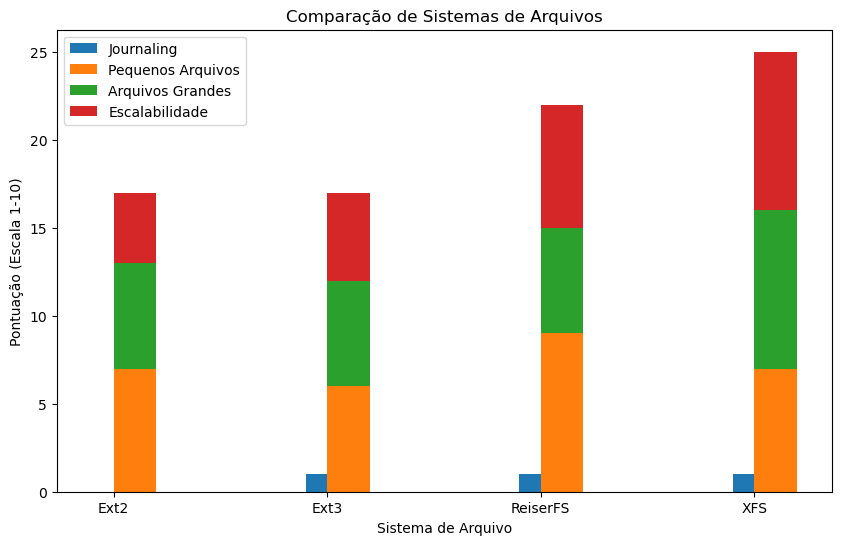

In [3]:
import matplotlib.pyplot as plt

# Dados do gráfico
labels = ['Ext2', 'Ext3', 'ReiserFS', 'XFS']
journaling = [0, 1, 1, 1]
performance_small_files = [7, 6, 9, 7]
performance_large_files = [6, 6, 6, 9]
scalability = [4, 5, 7, 9]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels, journaling, width=0.2, label='Journaling', align='center')
ax.bar(labels, performance_small_files, width=0.2, label='Pequenos Arquivos', align='edge')
ax.bar(labels, performance_large_files, width=0.2, label='Arquivos Grandes', align='edge', bottom=performance_small_files)
ax.bar(labels, scalability, width=0.2, label='Escalabilidade', align='edge', bottom=[i+j for i,j in zip(performance_small_files, performance_large_files)])

# Adicionando títulos e rótulos
ax.set_title('Comparação de Sistemas de Arquivos')
ax.set_ylabel('Pontuação (Escala 1-10)')
ax.set_xlabel('Sistema de Arquivo')

ax.legend()

plt.show()

## parte 3

### tarefa 9

In [ ]:
# Usando o terminal para executar comandos SQL no PostgreSQL
!sudo -u postgres psql -c "DROP TABLE IF EXISTS t;"
!sudo -u postgres psql -c "CREATE TABLE t (k serial PRIMARY KEY, v integer);"
!sudo -u postgres psql -c "INSERT INTO t(v) SELECT trunc(random() * 10) FROM generate_series(1,100000);"



could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
DROP TABLE
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
CREATE TABLE
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
INSERT 0 100000
could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
 k  | v 
----+---
  1 | 6
  2 | 4
  3 | 9
  4 | 0
  5 | 2
  6 | 4
  7 | 6
  8 | 3
  9 | 7
 10 | 9
(10 rows)



In [10]:
# Executa o comando SQL para selecionar as primeiras 10 tuplas, ordenadas por k
!sudo -u postgres psql -c "SELECT * FROM t ORDER BY k LIMIT 10;"

could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
 k  | v 
----+---
  1 | 6
  2 | 4
  3 | 9
  4 | 0
  5 | 2
  6 | 4
  7 | 6
  8 | 3
  9 | 7
 10 | 9
(10 rows)



### tarefa 10

In [11]:
# Consulta o número de páginas de blocos e de tuplas da tabela 't'
!sudo -u postgres psql -c "SELECT relname, relpages, reltuples FROM pg_class WHERE relname='t';"


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
 relname | relpages | reltuples 
---------+----------+-----------
 t       |      443 |    100000
(1 row)



### tarefa 11

In [15]:
%%bash
sudo -u postgres psql -v ON_ERROR_STOP=1 <<EOF
\pset x on
SELECT pg_sleep(1);
SELECT * FROM pg_stats WHERE tablename='t';
SELECT pg_stat_reset();
\pset x off
EOF


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada


Expanded display is on.
-[ RECORD 1 ]
pg_sleep | 

-[ RECORD 1 ]----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
schemaname             | public
tablename              | t
attname                | k
inherited              | f
null_frac              | 0
avg_width              | 4
n_distinct             | -1
most_common_vals       | 
most_common_freqs      | 
histogram_bounds       | {8,1005,1923,2921,4000,5034,6021,7065,8025,9026,9981,11024

### tarefa 12

In [17]:
%%bash
# Iniciar sessão psql para criar o índice e realizar as consultas
sudo -u postgres psql <<EOF
\pset x on
\timing

# Criar um índice para o atributo 'v'
CREATE INDEX idx_v ON t(v);

# Consultar a tabela buscando um valor específico de 'v' e medir o tempo
EXPLAIN ANALYZE SELECT * FROM t WHERE v = 5;

# Medir o tempo para recriar o índice para o atributo 'v'
DROP INDEX idx_v;
CREATE INDEX idx_v ON t(v);

EOF


could not change directory to "/home/zico/.local/share/Trash/files/tpch-pgsql": Permissão negada
psql: error: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: Arquivo ou diretório inexistente
	Is the server running locally and accepting connections on that socket?


CalledProcessError: Command 'b"# Iniciar sess\xc3\xa3o psql para criar o \xc3\xadndice e realizar as consultas\nsudo -u postgres psql <<EOF\n\\pset x on\n\\timing\n\n# Criar um \xc3\xadndice para o atributo 'v'\nCREATE INDEX idx_v ON t(v);\n\n# Consultar a tabela buscando um valor espec\xc3\xadfico de 'v' e medir o tempo\nEXPLAIN ANALYZE SELECT * FROM t WHERE v = 5;\n\n# Medir o tempo para recriar o \xc3\xadndice para o atributo 'v'\nDROP INDEX idx_v;\nCREATE INDEX idx_v ON t(v);\n\nEOF\n"' returned non-zero exit status 2.